In [46]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

# from Models.dataset import load_train_data, load_test_data


In [67]:
def load_train_data(img_size):
    """
    This function loads a dataset of images from a specified path, resizes the images, 
    and stores them in a pandas DataFrame along with their respective classes.

    The images are categorized into four classes: 'MildDemented', 'ModerateDemented', 
    'NonDemented', and 'VeryMildDemented'. The function iterates through each class, 
    opens and resizes the images, and appends them to a dictionary along with their class.

    The dictionary is then converted into a pandas DataFrame and returned.

    Returns:
        df_train (pd.DataFrame): A DataFrame containing the resized images and their classes.
    """
    
    df_train=[] # create a dictionary to store the dataset
    labels=[] # create a list to store the labels

    """# create dataset from the image folder"""

    classes=['MildDemented','ModerateDemented','NonDemented','VeryMildDemented']
    train_path=''

    for i in classes:
        if i=='MildDemented':
            train_path='../Dataset/train/MildDemented/mildDem'
        elif i=='ModerateDemented':
            train_path='../Dataset/train/ModerateDemented/moderateDem'
        elif i=='NonDemented':
            train_path='../Dataset/train/NonDemented/nonDem'
        else:
            train_path='../Dataset/train/VeryMildDemented/veryMildDem'
        for j in range(100000):
            try:
                img=cv2.imread(f'{train_path}{j}.jpg',cv2.IMREAD_GRAYSCALE)
                df_train.append(cv2.resize(img,(img_size,img_size)).reshape(img_size*img_size))
                labels.append(i)

            except:
                break

    """# save Dataset into a pandas Dataframe"""
    return np.array(df_train),labels

In [68]:
img_size=100
df_train,labels=load_train_data(img_size)

In [69]:
print(df_train.shape)
# df_train.head()
df_train=pd.DataFrame(df_train)
df_train['class']=labels

(5121, 10000)


In [70]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,MildDemented
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,MildDemented
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,MildDemented
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,MildDemented
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,MildDemented


In [72]:
X,Y=df_train.iloc[:,:-1].values,df_train.iloc[:,-1]
X=X.reshape(X.shape[0],img_size,img_size,1)



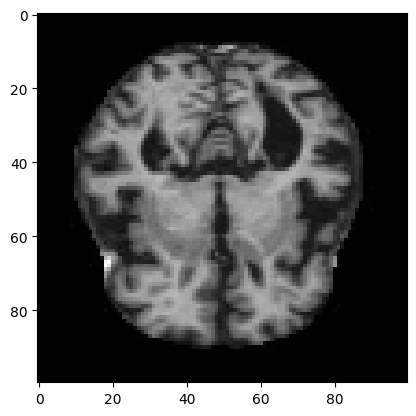

In [73]:
plt.imshow(X[0],cmap='gray')

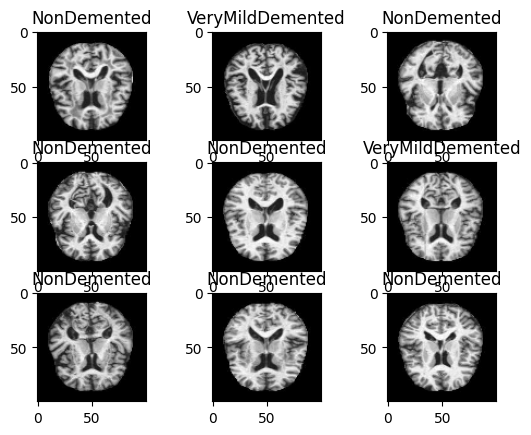

In [74]:
import random
for i in range(0,9):
    j=random.randint(0,X.shape[0])
    plt.subplot(330+1+i)
    plt.imshow(X[j].reshape(img_size,img_size),cmap=plt.get_cmap('gray'))
    plt.title(Y[j])

In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [76]:
Y_train
# encode the target variable
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y_train=le.fit_transform(Y_train)
Y_test=le.transform(Y_test)


# Training without 5-Fold CV

In [77]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from keras.utils import to_categorical

y_train=to_categorical(Y_train)
y_test=to_categorical(Y_test)

model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(img_size,img_size,1),padding='same')) #f=3,p=1,s=1,c=32
model.add(MaxPooling2D(2,2)) #f=2,s=2

model.add(Conv2D(32,(3,3),activation='relu',padding='same')) #f=3,p=1,s=1,c=32 
# add batch normalisation
model.add(BatchNormalization())
# Add pooling layer
model.add(MaxPooling2D(2,2)) #f=2,s=2
model.add(Conv2D(64,(3,3),activation='relu',padding='same')) #f=3,p=1,s=1,c=64 
model.add(MaxPooling2D(2,2)) #f=2,s=2

model.add(Conv2D(64,(3,3),activation='relu',padding='same')) #f=3,p=1,s=1,c=64 
model.add(MaxPooling2D(2,2)) #f=2,s=2

model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),activation='relu',padding='same')) #f=3,p=1,s=1,c=64
#Add pooling layer
model.add(MaxPooling2D(2,2)) #f=2,s=2
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4,activation='softmax'))

model.compile(optimizer=Adam(lr=0.001),loss=categorical_crossentropy,metrics=['accuracy'])

model.fit(X_train,y_train,epochs=10,batch_size=128,validation_data=(X_test,y_test))




Epoch 1/10


c:\Users\arora\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


32/32 [==============================] - 39s 1s/step - loss: 1.0904 - accuracy: 0.5195 - val_loss: 1.1676 - val_accuracy: 0.4917
Epoch 2/10
32/32 [==============================] - 41s 1s/step - loss: 0.8422 - accuracy: 0.5989 - val_loss: 1.6030 - val_accuracy: 0.4868
Epoch 3/10
32/32 [==============================] - 42s 1s/step - loss: 0.7844 - accuracy: 0.6340 - val_loss: 0.8270 - val_accuracy: 0.6195
Epoch 4/10
32/32 [==============================] - 36s 1s/step - loss: 0.6347 - accuracy: 0.7349 - val_loss: 1.1929 - val_accuracy: 0.4029
Epoch 5/10
32/32 [==============================] - 36s 1s/step - loss: 0.5324 - accuracy: 0.7817 - val_loss: 1.0098 - val_accuracy: 0.5346
Epoch 6/10
32/32 [==============================] - 36s 1s/step - loss: 0.4090 - accuracy: 0.8438 - val_loss: 0.5890 - val_accuracy: 0.7746
Epoch 7/10
32/32 [==============================] - 36s 1s/step - loss: 0.3339 - accuracy: 0.8723 - val_loss: 0.8337 - val_accuracy: 0.6263
Epoch 8/10
32/32 [=============

# Training with 5-Fold CV

In [ ]:
from sklearn.model_selection import KFold
from keras.models import load_model
from keras.losses import categorical_crossentropy
from keras.utils import to_categorical

kf=KFold(n_splits=5,shuffle=True,random_state=42)
kf.get_n_splits(X)

y=to_categorical(Y)
accs=[]

for train_index,test_index in kf.split(X):
    
    X_train,X_test=X[train_index],X[test_index]
    y_train,y_test=y[train_index],y[test_index]
    
    # model=load_model('model.h5')
    
    model.fit(X_train,y_train,epochs=10,batch_size=128,validation_data=(X_test,y_test))
    
    model.save('model_5_CV.h5')
    
    accs.append(model.evaluate(X_test,y_test)[1])
print(f'Accuracy after 5-Fold CV: {np.mean(accs)}')

In [ ]:
model.save('model.h5')